# Importing libraries and Dataframes

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing data from 'ords_prods_merged'
path = r'/Users/marialuciaguarita/MLCG Instacart Basket Analysis'
ords_prods_cust_merge = pd.read_pickle(os.path.join(path,'Data','Prepared Data','orders_products_customers.pkl'))

In [4]:
#Checking for null values
ords_prods_cust_merge.isnull().sum()

user_id                          0
gender                           0
state                            0
age                              0
date_joined                      0
n_dependants                     0
fam_status                       0
income                           0
product_id                       0
product_name                     0
aisle_id                         0
department_id                    0
prices                        5127
order_id                         0
eval_set                         0
order_number                     0
orders_day_of_week               0
order_hour_of_day                0
days_since_prior_order     2076096
add_to_cart_order                0
reordered                        0
price_range_loc                  0
busiest_day                      0
frequency_of_days_loc     12916111
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
max_spend                        0
spending_flag       

# Data Visualizations

In [5]:
#Checking days_since_prior_order null values
crosstab = pd.crosstab(ords_prods_cust_merge['days_since_prior_order'], ords_prods_cust_merge['order_number'], dropna = False)

In [7]:
crosstab.to_clipboard()

In [ ]:
#Changing columns name 
customers_w.rename(columns = {'price_range_loc' : 'gender'}, inplace = True)

<AxesSubplot:ylabel='Frequency'>

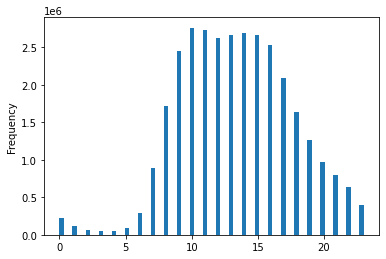

In [4]:
#Creating an Histogram - Order hour of the day
ords_prods_cust_merge ['order_hour_of_day'].plot.hist (bins = 70)

We can see in the Histogram that the shopping peak hours predominate between 8 am to 6 pm. Peak at 10 am and 11 pm.

<AxesSubplot:>

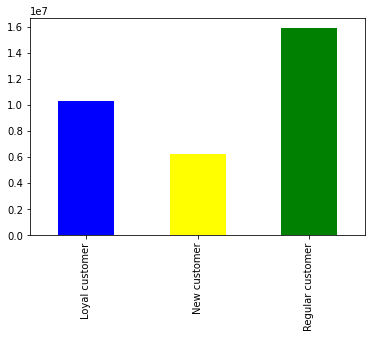

In [5]:
#Creating Bar Charts - Loyalty Flag
ords_prods_cust_merge['loyalty_flag'].value_counts().sort_index().plot.bar(color=['blue','yellow','green'])

In [6]:
#Line Chart 1 - Prices x Hour of the day
# Create a list holding True/False values to the test np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [7]:
# Store 70% of the sample in the dataframe big 
big = ords_prods_cust_merge[dev]

In [8]:
# Store 30% of the sample in the dataframe small 
small = ords_prods_cust_merge[~dev]

In [9]:
#Checking data
len(big) + len(small)

32404859

In [10]:
ords_prods_cust_merge_2 = small[['order_hour_of_day','prices']]

In [11]:
df = small[['order_hour_of_day','prices']]

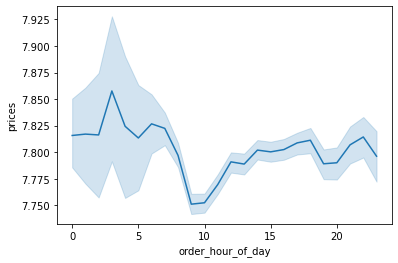

In [12]:
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

It is noted that throughout the day, the average purchase price shows a peak at dawn and a significant decline around 9 am, with a slight increase after 8 pm.

In [13]:
#Line Chart 2 - Age x N. Dependents
ords_prods_cust_merge_3 = small[['n_dependants','age']]

In [14]:
df1 = small[['n_dependants','age']]

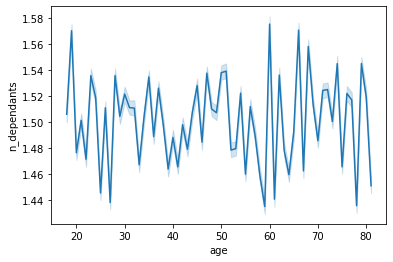

In [15]:
line = sns.lineplot(data = df1, x = 'age',y = 'n_dependants')

Despite the linear graph showing some peaks and valleys at certain ages in terms of the average number of dependents, given an important oscillation, I do not believe, visually, that a direct relationship can be established between age and number of dependents. Interestingly, there is a spike in dependents in people aged 20, 60 and even 80, ages at which it is expected that the person is more likely to live alone.

<AxesSubplot:xlabel='age', ylabel='income'>

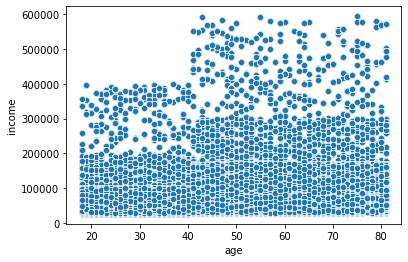

In [18]:
#Creating an Scatterplot - Age x Spending Power
sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust_merge)

In [23]:
ords_prods_cust_merge.groupby('age').agg({'income': ['mean','min','max']})

income               
              mean    min     max
age                              
18    70471.861282  26067  357226
19    69774.691204  25972  396364
20    70785.248085  26024  338939
21    70566.302749  25937  372571
22    69864.954946  26070  369192
..             ...    ...     ...
77   116565.185651  30031  512331
78   117107.506791  29113  381735
79   115239.011993  29330  579169
80   114279.443528  29008  569253
81   115055.033192  29738  571932

[64 rows x 3 columns]

It is observed with the scatter plot that the income undergoes an important change from the age of 43, with more people with spending power above $200,000/year, with the maximum value jumping from $400,000/year to $600,000/year. However, this type of graph does not allow a clear understanding of the mean values by age as it is shown in the table above.

In [10]:
ords_prods_cust_merge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'frequency_of_days_loc', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'max_spend', 'spending_flag', 'frequency_range',
       'frequency_flag', 'merge_3'],
      dtype='object')